# Correlation & Convolution

In [1]:
from keras.datasets.mnist import load_data
import numpy as np

Using TensorFlow backend.


In [135]:
(x_train, y_train), (x_test, y_test) = load_data("/data/mnist.npz",)

In [136]:
x_train, y_train, x_test, y_test = x_train.reshape(60000,-1)/256, np.eye(10)[y_train], x_test.reshape(10000,-1)/256, np.eye(10)[y_test]

In [4]:
from matplotlib import pyplot as plt

# you don't have to worry the following piece of code in this cell
# We simply build a function, to plot number arrays to image
# The visualization isn't the point of this class
# just load the function, then you can use plot(input_image_array), and shift enter, it will show the image in notebook
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

(None, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

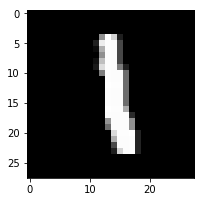

In [5]:
plot(x_train[6].reshape(28,28)),y_train[6]

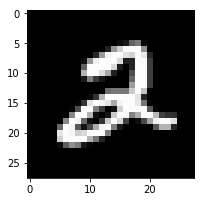

In [6]:
figure = x_train[5].reshape(28,28)
plot(figure)

In [7]:
filter1 = np.array([[0,0.5,0],
                    [0.5,-1,0.5],
                    [0,0.5,0]])

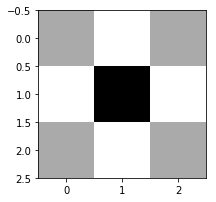

In [8]:
plot(filter1)

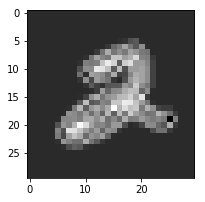

In [9]:
from scipy.signal import correlate2d
plot(correlate2d(figure,filter1))

In [10]:
filter2 = np.array([[1,0.5,1],
                    [0.5,-1,0.5],
                    [1,0.5,1]])

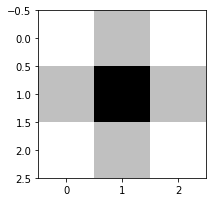

In [11]:
plot(filter2)

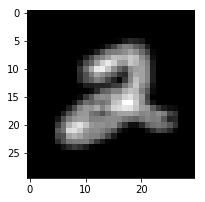

In [12]:
plot(correlate2d(figure,filter2))

In [13]:
filter_edge = np.array([[1,0.5,0],
                    [0.5,0,-0.5],
                    [0,-0.5,-1]])

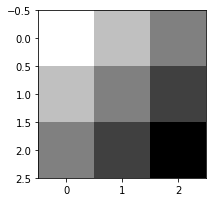

In [14]:
plot(filter_edge)

(None, None, None, None)

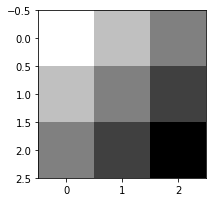

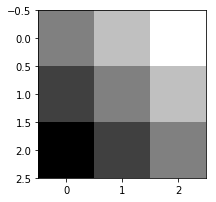

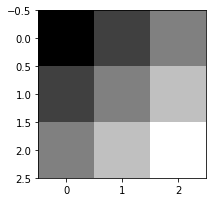

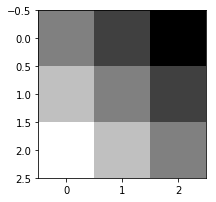

In [15]:
fe_1 = filter_edge
fe_2 = fe_1.T[:,::-1]
fe_3 = fe_2.T[:,::-1]
fe_4 = fe_3.T[:,::-1]
plot(fe_1),plot(fe_2),plot(fe_3),plot(fe_4)

(None, None, None, None)

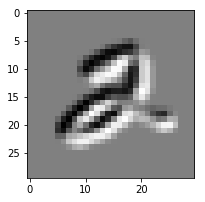

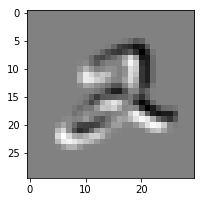

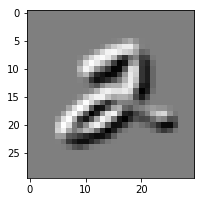

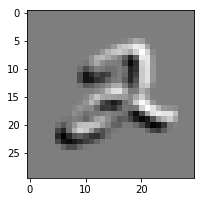

In [16]:
plot(correlate2d(figure,fe_1)),plot(correlate2d(figure,fe_2)),plot(correlate2d(figure,fe_3)),plot(correlate2d(figure,fe_4))

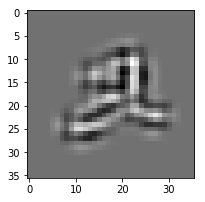

In [17]:
plot(correlate2d(correlate2d(correlate2d(correlate2d(figure,fe_1),fe_2),fe_3),fe_4))

### MNIST Hacking


In [18]:
from keras.layers import *
from keras.models import Model,Sequential

### Standard MLP

In [19]:
md=Sequential([
    Dense(512,activation="relu",input_shape=(784,)),# relu is like max(x,0) in excel
    Dense(10,activation="softmax"),#output layer neuron number must be 10 to match y's dimension
])
md.compile(loss="categorical_crossentropy",
           optimizer="Adam", 
           metrics=["accuracy"]
          )

In [20]:
md.fit(x_train,y_train,
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=10,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2330 - acc: 0.9331 - val_loss: 0.1199 - val_acc: 0.9636
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0911 - acc: 0.9728 - val_loss: 0.0867 - val_acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0708 - val_acc: 0.9779
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0408 - acc: 0.9874 - val_loss: 0.0622 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0301 - acc: 0.9911 - val_loss: 0.0653 - val_acc: 0.9787
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0626 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0172 - acc: 0.9945 - val_loss: 0.0670 - val_ac

### Convolution

In [21]:
input_ = Input((784,))
x = Reshape((28,28,1))(input_)
x = Convolution2D(filters=64,kernel_size=3,padding="same",activation="relu")(x)
x = Convolution2D(filters=64,kernel_size=3,padding="same")(x)
x = MaxPool2D()(x)
x = Convolution2D(filters=64,kernel_size=3,padding="same",activation="relu")(x)
x = Convolution2D(filters=64,kernel_size=3,padding="same")(x)
x = MaxPool2D()(x)
x = Convolution2D(filters=128,kernel_size=3,padding="same",activation="relu")(x)
x = Convolution2D(filters=128,kernel_size=3,padding="same",activation="relu")(x)
x = Convolution2D(filters=128,kernel_size=3,padding="same")(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(256,activation="relu")(x)
x = Dense(10,activation="softmax")(x)

md = Model(input_,x)
md.compile(loss="categorical_crossentropy",
           optimizer="Adam", 
           metrics=["accuracy"]
          )

In [22]:
md.fit(x_train,y_train,
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=5,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.1302 - acc: 0.9589 - val_loss: 0.0333 - val_acc: 0.9886
Epoch 2/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0303 - val_acc: 0.9902
Epoch 3/5
60000/60000 [==============================] - 14s 225us/step - loss: 0.0345 - acc: 0.9890 - val_loss: 0.0342 - val_acc: 0.9892
Epoch 4/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.0265 - acc: 0.9920 - val_loss: 0.0398 - val_acc: 0.9897
Epoch 5/5
60000/60000 [==============================] - 13s 224us/step - loss: 0.0259 - acc: 0.9921 - val_loss: 0.0310 - val_acc: 0.9897


### BatchNorm

In [23]:
def conv_bn(x,f_nb, ks=3,act=True):
    x = Convolution2D(filters=f_nb,kernel_size=ks,padding="same")(x)
    x = BatchNormalization()(x)
    if act:x = ReLU()(x)
    return x

In [35]:
input_ = Input((784,))
x = Reshape((28,28,1))(input_)
x = conv_bn(x,32)
x = conv_bn(x,32,act=False)
x = MaxPool2D()(x)
x = conv_bn(x,64)
x = conv_bn(x,64,act=False)
x = MaxPool2D()(x)
x = conv_bn(x,128)
x = conv_bn(x,128)
x = conv_bn(x,128,act=False)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(256,activation="relu")(x)
x = Dropout(.3)(x)
x = Dense(10,activation="softmax")(x)

md = Model(input_,x)
md.compile(loss="categorical_crossentropy",
           optimizer="Adam", 
           metrics=["accuracy"]
          )

In [37]:
md.fit(x_train,y_train,
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=1,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 16s 272us/step - loss: 0.0251 - acc: 0.9922 - val_loss: 0.0369 - val_acc: 0.9904


In [38]:
md.fit(x_train,y_train,
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=4,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s 273us/step - loss: 0.0199 - acc: 0.9940 - val_loss: 0.0242 - val_acc: 0.9919
Epoch 2/4
60000/60000 [==============================] - 16s 273us/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.0304 - val_acc: 0.9925
Epoch 3/4
60000/60000 [==============================] - 16s 272us/step - loss: 0.0153 - acc: 0.9953 - val_loss: 0.0316 - val_acc: 0.9912
Epoch 4/4
60000/60000 [==============================] - 16s 273us/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0290 - val_acc: 0.9932


In [39]:
from keras.preprocessing.image import apply_affine_transform

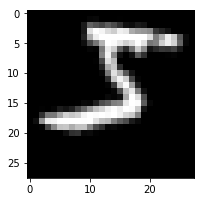

In [97]:
plot(apply_affine_transform(x_train[0].reshape(28,28,1),theta=15,tx = 3).reshape(28,28))

In [138]:
def aug_x(x):
    random_aug = (np.random.rand(4)-0.5)*np.array([20,5,5,10])

    aug_conf = {"theta":random_aug[0],
     "tx":random_aug[1],
     "ty":random_aug[2],
     "shear":random_aug[3],}

    x = apply_affine_transform(x.reshape(28,28,1),**aug_conf).reshape(28,28)
    return x

In [139]:
def aug_xs(x_train):
    x_train = x_train.reshape(-1,28,28)
    train_len = x_train.shape[0]
    for i in range(train_len):
        x_train[i] = aug_x(x_train[i])

    return x_train.reshape(-1,784)

In [142]:
input_ = Input((784,))
x = Reshape((28,28,1))(input_)
x = conv_bn(x,32)
x = conv_bn(x,32,act=False)
x = MaxPool2D()(x)
x = conv_bn(x,64)
x = conv_bn(x,64,act=False)
x = MaxPool2D()(x)
x = conv_bn(x,128)
x = conv_bn(x,128)
x = conv_bn(x,128,act=False)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(256,activation="relu")(x)
x = Dropout(.3)(x)
x = Dense(10,activation="softmax")(x)

md = Model(input_,x)
md.compile(loss="categorical_crossentropy",
           optimizer="Adam", 
           metrics=["accuracy"]
          )

In [143]:
for i in range(8):
    x_aug = aug_xs(x_train.copy())
    md.fit(np.concatenate([x_aug,x_train],axis=0),np.concatenate([y_train,y_train],axis=0),
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=1,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 37s 309us/step - loss: 0.1116 - acc: 0.9660 - val_loss: 0.0391 - val_acc: 0.9887
Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 33s 273us/step - loss: 0.0491 - acc: 0.9857 - val_loss: 0.0336 - val_acc: 0.9896
Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 33s 273us/step - loss: 0.0388 - acc: 0.9888 - val_loss: 0.0422 - val_acc: 0.9875
Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 33s 273us/step - loss: 0.0336 - acc: 0.9902 - val_loss: 0.0250 - val_acc: 0.9937
Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 33s 273us/step - loss: 0.0289 - acc: 0.9919 - val_loss: 0.0277 - val_acc: 0.9917
Train on 120000 samples, validate on 10000 sa

In [144]:
for i in range(1):
    x_aug = aug_xs(x_train.copy())
    md.fit(np.concatenate([x_aug,x_train],axis=0),np.concatenate([y_train,y_train],axis=0),
       validation_data=(x_test,y_test), # validation data, not involved in training, but exam the model for each epoch
       epochs=1,# how many time we are going to run through the entire training data
       batch_size=64,#how many image's we process per batch
      )

Train on 120000 samples, validate on 10000 samples
Epoch 1/1
120000/120000 [==============================] - 33s 273us/step - loss: 0.0197 - acc: 0.9943 - val_loss: 0.0276 - val_acc: 0.9931
